In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

from pts.model.deepar import DeepAREstimator
from pts import Trainer

/Users/abhishek.sawalkar/opt/anaconda3/envs/ml2/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/abhishek.sawalkar/opt/anaconda3/envs/ml2/lib/python3.6/site-packages/gluonts/json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [2]:
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

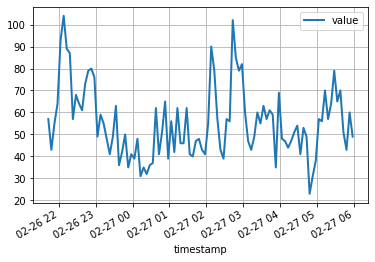

In [3]:
df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [5]:
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    # [{"start": df.index[0], "target": df.values[:,0]}],
    freq = "5min"
)

# dataset_train = list(train_grouper(dataset.train))
# training_data *= 100 

In [14]:
from gluonts.env import env

env._set("max_idle_transforms", 100)

In [7]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device=torch.device("cpu")
estimator = DeepAREstimator(freq="5min",
                            prediction_length=12,
                            input_size=19,
                            trainer=Trainer(epochs=10,
                                            device=device))
predictor = estimator.train(training_data=training_data, num_workers=4)

100%|██████████| 49/49 [00:00<00:00, 50.27it/s, epoch=10/10, avg_loss=3.95]


In [8]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

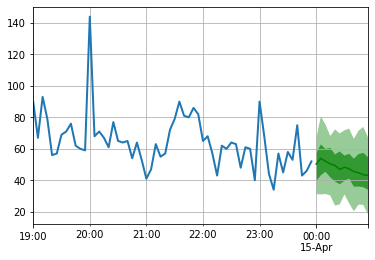

In [9]:
for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')